Лабораторная работа №1
Шубина София НПИбд-02-23


# Задачи

Импортировать данные из файла price_long.csv, проверить их на пропуски и построить график исходного временного ряда.

Выполнить агрегацию данных по дням, вычислив среднее значение цен за каждый день, и визуализировать результат.

Выделить срез данных за выбранный период и построить соответствующий график.

Провести декомпозицию временного ряда, определить тренд и сезонную компоненты, построить графики этих компонентов.

Рассчитать скользящее среднее и отобразить его на графике для наглядного анализа тенденций.

Выполнить визуальный анализ полученных графиков и сформулировать основные выводы о динамике цен.

# Импорт библиотек и загрузка данных
- `pandas` используется для работы с табличными данными, `matplotlib.pyplot` — для построения графиков.
- `statsmodels.tsa.seasonal.seasonal_decompose` понадобится для декомпозиции временного ряда на тренд, сезонность и остатки.
- Данные загружаются из CSV-файла `price_long.csv` с преобразованием столбца `Time` в формат даты (`datetime`) и установкой его в качестве индекса.
- Далее выводится общая информация о наборе данных (`df.info()`) и проверка на наличие пропущенных значений (`df.isnull().sum()`), чтобы оценить полноту и корректность данных.


In [4]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Загрузка данных
df = pd.read_csv('price_long.csv',
                 parse_dates=['Time'],
                 index_col='Time')

print("Основная информация о данных:")
df.info()
print("\nПропущенные значения в данных:\n", df.isnull().sum())

Основная информация о данных:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2017-05-02 00:00:00 to 2017-06-12 15:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price ($)  1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB

Пропущенные значения в данных:
 Price ($)    0
dtype: int64


# Визуализация временного ряда и агрегированных данных

- **Исходный временной ряд:** строится график всех почасовых цен, чтобы увидеть общую динамику и колебания во времени.
- **Среднее по дням:** данные агрегируются по дням с вычислением среднего значения цен (`resample('D').mean()`), что позволяет сгладить краткосрочные колебания и лучше выявить тренд.
- `figsize`, `color`, `grid`, `xlabel`, `ylabel`, `title` — параметры для настройки внешнего вида графиков.


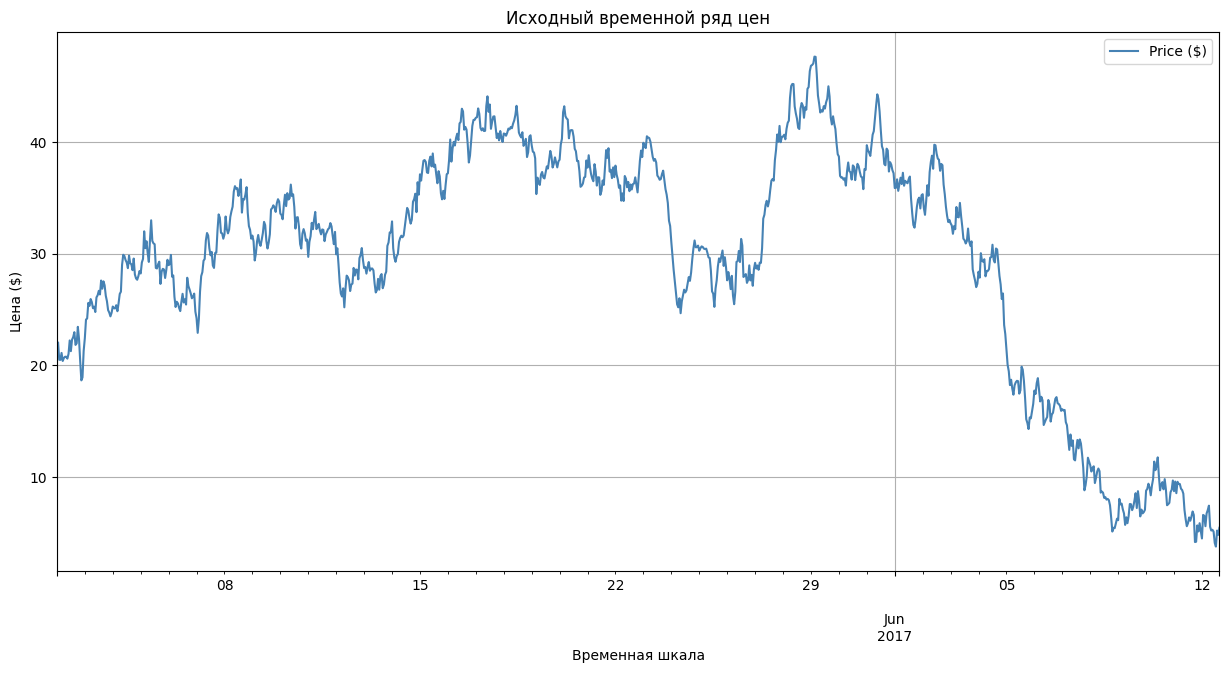

In [5]:
# 2. Исходный временной ряд
df.plot(figsize=(15, 7),
        color='steelblue',
        grid=True,
        xlabel='Временная шкала',
        ylabel='Цена ($)',
        title='Исходный временной ряд цен')
plt.show()

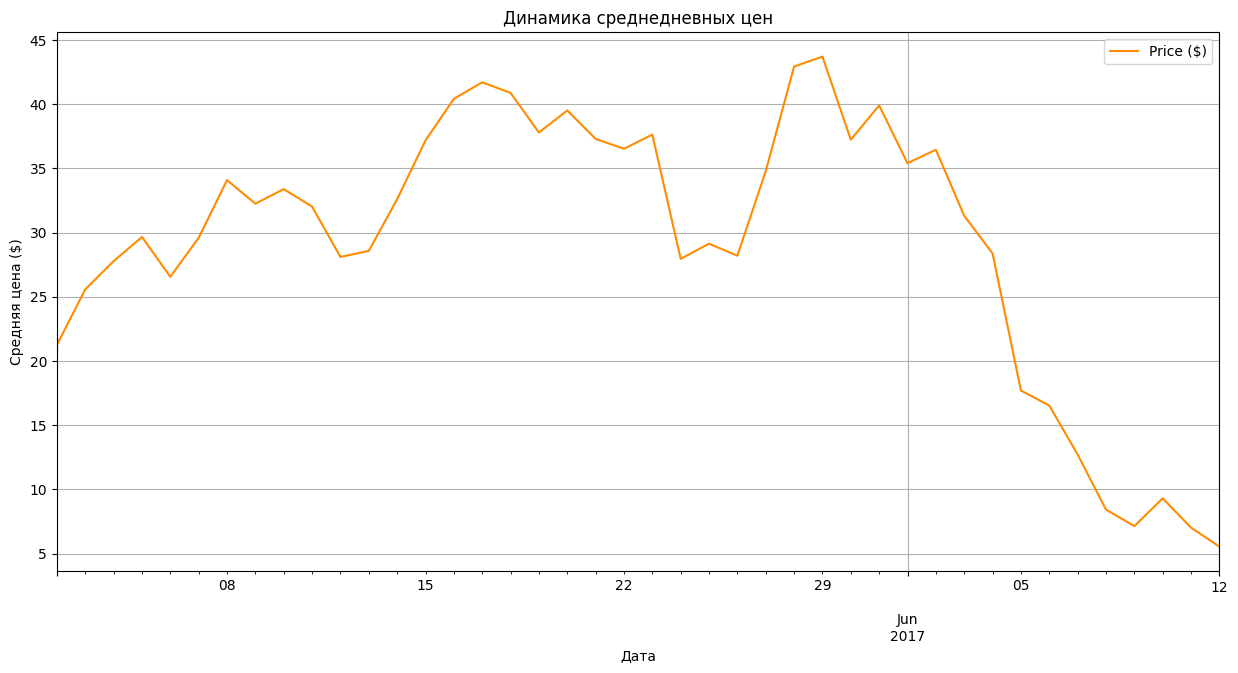

In [6]:


# 3. Среднее по дням
daily_df = df.resample('D').mean()
daily_df.plot(figsize=(15, 7),
              color='darkorange',
              grid=True,
              xlabel='Дата',
              ylabel='Средняя цена ($)',
              title='Динамика среднедневных цен')
plt.show()

# Срез данных за май 2017 года

- Выбирается подмножество данных за период с 2 по 29 мая 2017 года (`df['2017-05-02':'2017-05-29']`), чтобы более детально изучить динамику цен в конкретном месяце.
- Строится график выбранного среза для визуального анализа краткосрочных колебаний и тренда внутри этого периода.
- Параметры `figsize`, `color`, `grid`, `xlabel`, `ylabel`, `title` задают оформление графика.


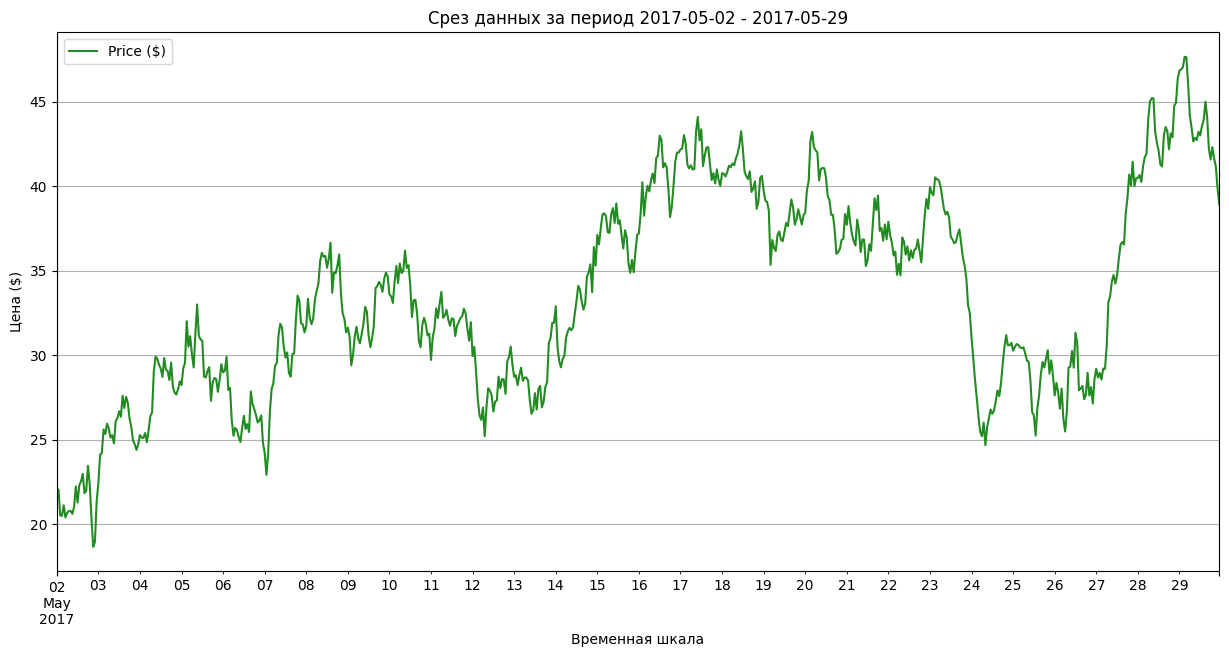

In [7]:
# 4. Срез данных (май 2017)
period_slice = df['2017-05-02':'2017-05-29']
period_slice.plot(figsize=(15, 7),
                  color='forestgreen',
                  grid=True,
                  xlabel='Временная шкала',
                  ylabel='Цена ($)',
                  title='Срез данных за период 2017-05-02 - 2017-05-29')
plt.show()

# Декомпозиция временного ряда

- Используется `seasonal_decompose` с периодом 24 (для почасовых данных, соответствующих суточной сезонности) для разложения временного ряда на три компоненты:  
  - **Тренд (trend):** долгосрочная тенденция изменения цен;  
  - **Сезонность (seasonality):** регулярные повторяющиеся колебания (суточный паттерн);  
  - **Остатки (resid):** случайные отклонения, не объясняемые трендом и сезонностью.  
- Построены четыре подграфика (`subplot`) для наглядного отображения исходного ряда, тренда, сезонной компоненты и остатков.  
- `plt.tight_layout()` корректирует размещение подграфиков для предотвращения наложения элементов.


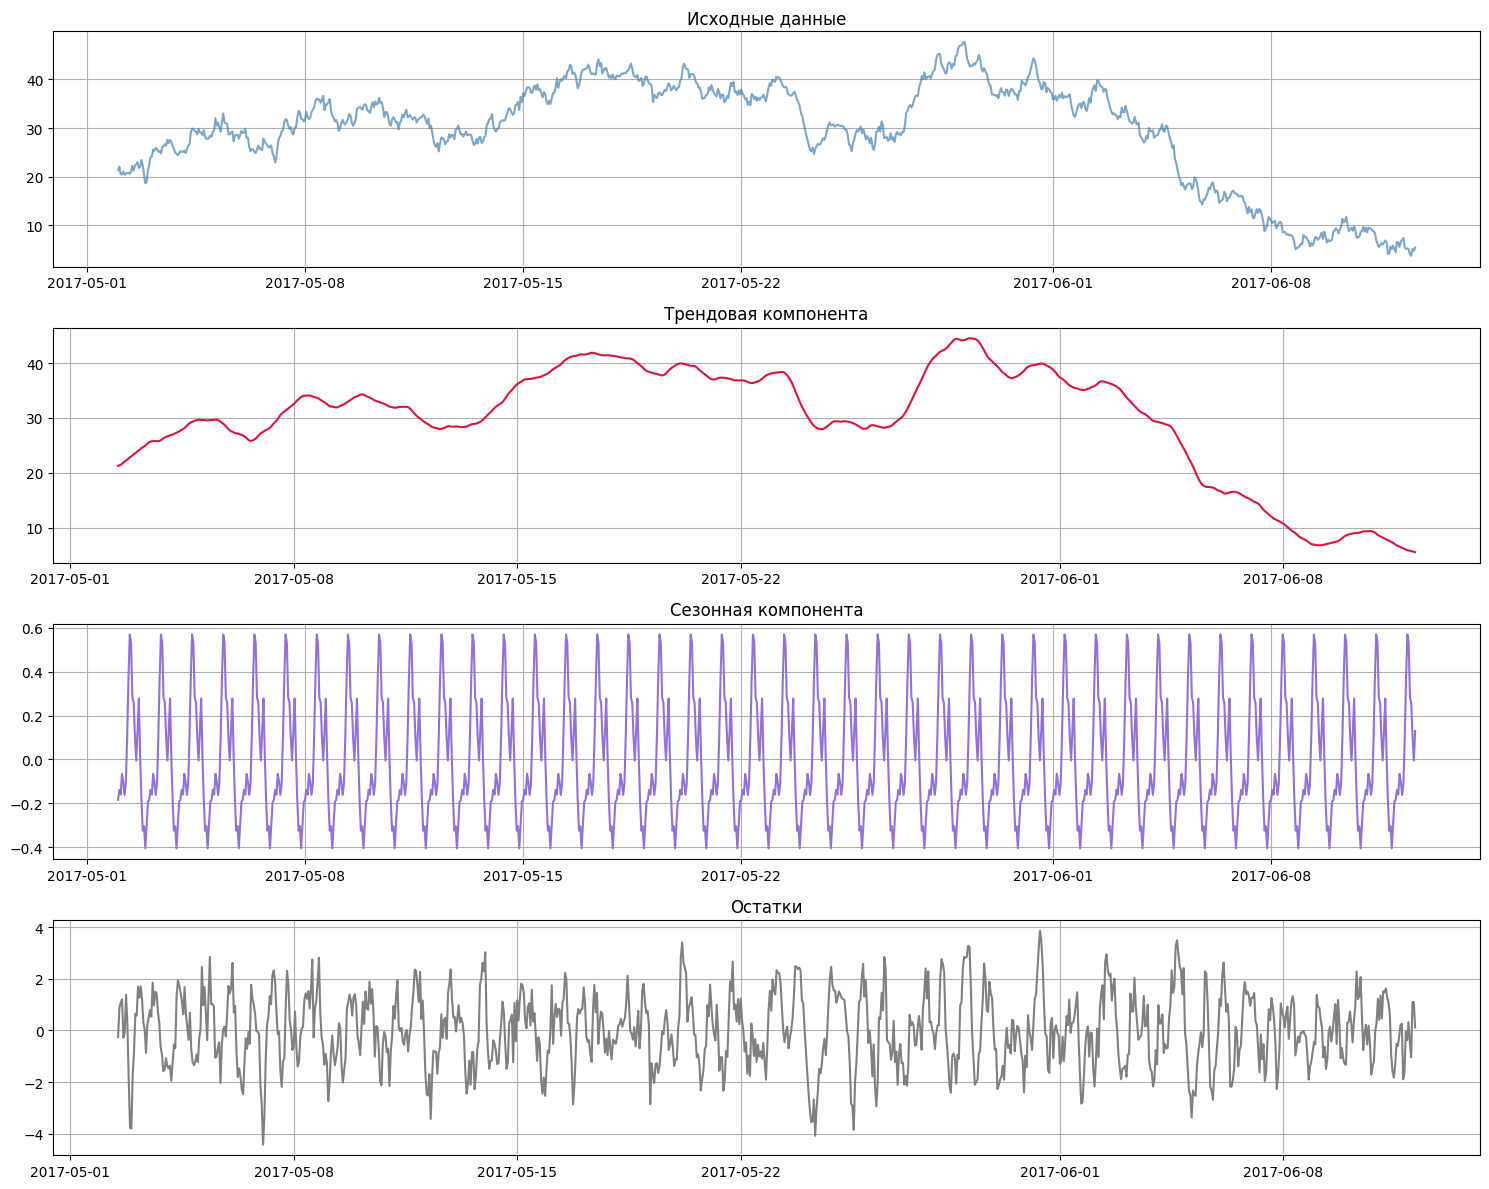

In [8]:
# 5. Декомпозиция временного ряда (суточная сезонность)
series_decomposition = seasonal_decompose(df, period=24)

trend = series_decomposition.trend
seasonality = series_decomposition.seasonal
residual = series_decomposition.resid

plt.figure(figsize=(15, 12))

# 1. Исходные данные
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Price ($)'], color='steelblue', alpha=0.7)
plt.title('Исходные данные')
plt.grid(True)

# 2. Тренд
plt.subplot(4, 1, 2)
plt.plot(trend.index, trend, color='crimson')
plt.title('Трендовая компонента')
plt.grid(True)

# 3. Сезонность
plt.subplot(4, 1, 3)
plt.plot(seasonality.index, seasonality, color='mediumpurple')
plt.title('Сезонная компонента')
plt.grid(True)

# 4. Остатки
plt.subplot(4, 1, 4)
plt.plot(residual.index, residual, color='gray')
plt.title('Остатки')
plt.grid(True)

plt.tight_layout()
plt.show()


# Скользящее среднее (24 часа)

- Создаётся копия исходного DataFrame (`df_analysis`) для расчёта скользящего среднего.  
- Скользящее среднее вычисляется с окном 24 часа (`rolling(window=24).mean()`), чтобы сгладить краткосрочные колебания и выделить основную тенденцию.  
- Строится график фактических цен и скользящего среднего за период с 2 по 31 мая 2017 года.  
- Цвета, сетка, подписи осей и легенда настраиваются для наглядной визуализации.


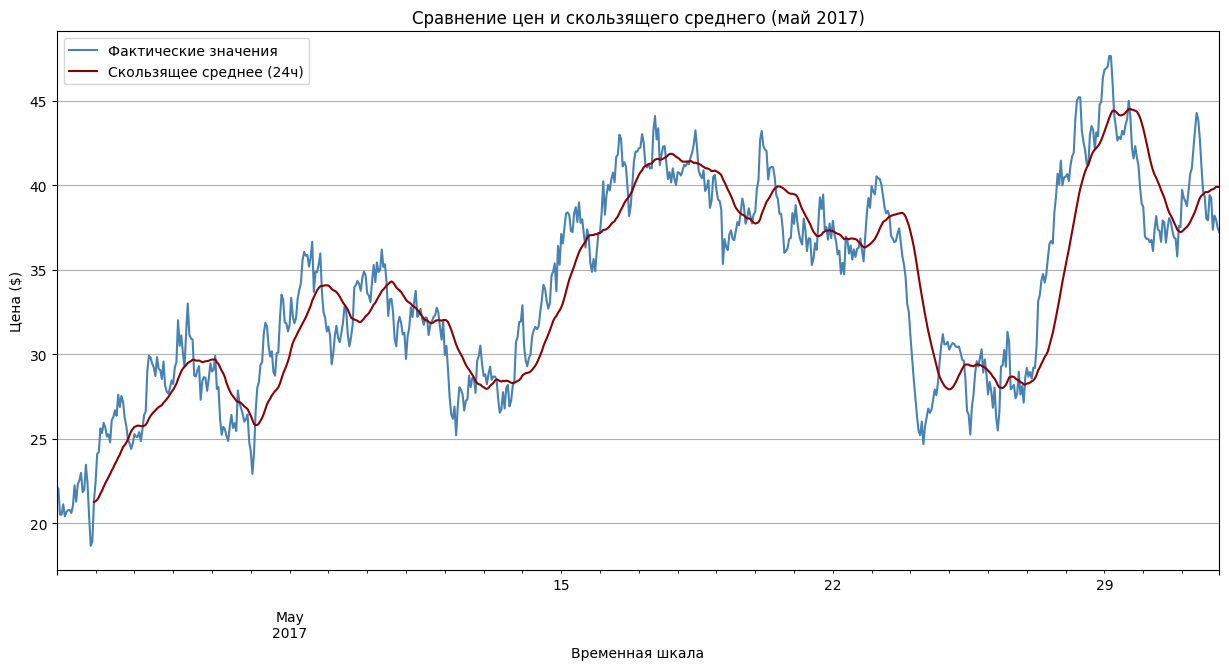

In [9]:
# 6. Скользящее среднее (24 часа)
df_analysis = df.copy()
df_analysis['rolling_mean'] = df_analysis['Price ($)'].rolling(window=24).mean()

df_analysis['2017-05-02':'2017-05-31'].plot(figsize=(15, 7),
color=['steelblue', 'darkred'],
grid=True,
xlabel='Временная шкала',
ylabel='Цена ($)',
title='Сравнение цен и скользящего среднего (май 2017)')
plt.legend(['Фактические значения', 'Скользящее среднее (24ч)'])
plt.show()

## Визуальный анализ временного ряда цен

### 1. Исходный временной ряд
График исходного временного ряда показывает значительные колебания цен с явным нисходящим трендом. Видна выраженная нестационарность: на протяжении периода наблюдается постепенное снижение цен с краткосрочными флуктуациями.

### 2. Среднее по дням
Агрегирование данных по дням (среднее значение за сутки) сглаживает краткосрочные колебания и делает тренд более очевидным. Наблюдается стабильное снижение среднедневных цен в течение рассматриваемого периода.

### 3. Срез данных за май 2017 года
Срез с 2 по 29 мая демонстрирует краткосрочную волатильность цен, сохраняя общую нисходящую динамику. Этот график позволяет рассмотреть внутридневные колебания и выявить резкие изменения цен.

### 4. Декомпозиция временного ряда
- **Тренд**: показывает устойчивое снижение цен на протяжении всего периода.  
- **Сезонность**: отражает повторяющиеся суточные колебания, характерные для почасового временного ряда.  
- **Остатки**: представляют собой случайные отклонения, не содержащие явных закономерностей.

### 5. Скользящее среднее
Скользящее среднее с окном 24 часа для периода мая 2017 года сглаживает суточные колебания и выделяет основную динамику изменения цен. Оно подтверждает нисходящую тенденцию, наблюдаемую в исходном ряде и на графике среднедневных цен.

## Вывод
Временной ряд нестационарен и характеризуется нисходящим трендом.  
Суточная сезонность выражена и стабильна.  
Краткосрочные колебания цен носят случайный характер.  
Применение среднего по дням и скользящего среднего позволяет выявить основную динамику и сгладить краткосрочные шумы.
